# Stage 1 Project


Daniel Pliego Mier, 29619889, group 26

Load libraries and get data:

In [2]:
# Run this cell before continuing.
library(tidyverse)
library(dplyr)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(AER)
library(glmnet)

ERROR: Error in library(infer): there is no package called ‘infer’


**Section 0: TA feedback**

I got almost full marks in stage 1 of the project other than some marks taken off because of typos and 10% deduction for subimiting on the wrong place. I will go through stage 1 and fix some of the typos, I'll mark the fixes in bold but no major changes will be done to my submission of stage 1.  

The TA feedback and grade: 
-10% for submitting into the wrong group page (-2.94)
26.46/30

**Section 1**

*Source and information*

The dataset used in this project is the Online Shoppers Purchasing Intention Dataset, obtained from the UCI Machine Learning Repository

The dataset was made on 2018 and consists of 12330 observations of users in an online shopping __website__, each observation corresponds to a single user session and it contains no missing values. The variables on the dataset are the following:

- `Administrative`: __integer__ representing number of administrative pages visited

- `Administrative_Duration`:  __integer__ representing total time passed in administrative pages

- `Informational`:  __integer__ representing number of informational pages visited
 
 - `Informational_Duration`:  __integer__ representing total time passed in informational pages

 - `ProductRelated	`:  __integer__ representing number of product related pages visited

 -  `ProductRelated_Duration`:  __integer__ representing total time passed in product related pages

 -  `BounceRates`: __continuous__ variable representing how quickly users leave pages (Google Analytics metric).

 -   `ExitRates`: __continuous__ variable representing how quickly users leave the website (Google Analytics metric).

 -  `PageValues`:  __integer__ representing estimated value of a page (Google Analytics metric).

   -  `SpecialDay`:  __integer__ representing the proximity of the date __accessed__ to a "special" day (valentines, christmas, etc).

-  `Month`: categorical variable representing each month

-  `OperatingSystems`: integer variable representing different operating systems (dataset description says this is an integer, I think it could be used as a categorical variable although there is no information about what each integer represents)

-  `Browser`: integer variable representing different browsers used (dataset description says this is an integer, I think it could be used as a categorical variable although there is no information about what each integer represents)

-  `Region`: integer variable representing which region the user is located (dataset description says this is an integer, I think it could be used as a categorical variable although there is no information about what each integer represents)

-  `TrafficType`: integer variable representing different __traffic types__ (dataset description says this is an integer, I think it could be used as a categorical variable although there is no information about what each integer represents)

-  `VisitorType`: categorical variable representing if a user is a returning user or a new user.

- `Weekend`: Binary categorical variable representing if this observation was on the weekend.

- `Revenue`: Binary categorical variable with TRUE if the user completed a purchase, FALSE otherwise.


Sakar, C. & Kastro, Y. (2018). Online Shoppers Purchasing Intention Dataset [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.



*Pre selection of variables*

I will not use the variables Browser, Region and TrafficType. This is because on the page of the dataset it says that they are integers, however I think they represent categories and I was not able to find which category each integer represents so in the case one of __these__ categories turned out to be important we could not know what it represents.

**Section 2**

*Scientific Question*

I want to examine the association between whether an online user makes a purchase (response) and predictors related to their browsing behavior (e.g., number of visits and time spent on administrative, informational, and product-related pages), as well as temporal and user characteristics (e.g., month, proximity to a special day, and whether the visitor is a returning user).

This means that the response variable is the Revenue variable which is TRUE if the user completed a purchase and FALSE otherwise, this means I will use a __Logistic__ model.

This project is based on prediction,  I want to be able to predict if a user is going to make a __purchase__ or not based on the explanatory variables above. 

*Response Variable*

The response variable is Revenue, which is TRUE if the user completed a purchase and FALSE otherwise. Since the response is binary, a logistic regression model will be used.

*Explain whether your question is focused on prediction, inference, or both*

This project mainly focuses on prediction, the goal is to predict whether a user will make a purchase based on the explanatory variables listed above. However, some inference will also be explored to understand which factors most strongly influence purchasing behavior.

**Section 3**

*Exploratory Data Analysis and Visualization*

The dataset was loaded into the same folder as this project file and no data cleaning other than removing the 3 variables that I stated I was not going to use since the dataset contains no missing valus.

In [3]:
data <- read.csv("project_data.csv")
data <- subset(data, select = -c(Browser, Region, TrafficType))
head(data)
nrow(data)

Administrative Administrative_Duration Informational Informational_Duration
1 0              0                       0             0                     
2 0              0                       0             0                     
3 0              0                       0             0                     
4 0              0                       0             0                     
5 0              0                       0             0                     
6 0              0                       0             0                     
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1               0.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  SpecialDay Month OperatingSystems VisitorType       Weekend Revenue
1 0          Feb   1                Returning_Visitor FALSE   FALSE  
2 0          Feb   2                Returning_Visitor FALSE   FALSE  
3 0          Feb   4                Returning_Visitor FALSE   FALSE  
4 0          Feb   3                Returning_Visitor FALSE   FALSE  
5 0          Feb   3                Returning_Visitor  TRUE   FALSE  
6 0          Feb   2                Returning_Visitor FALSE   FALSE

[1] 12330

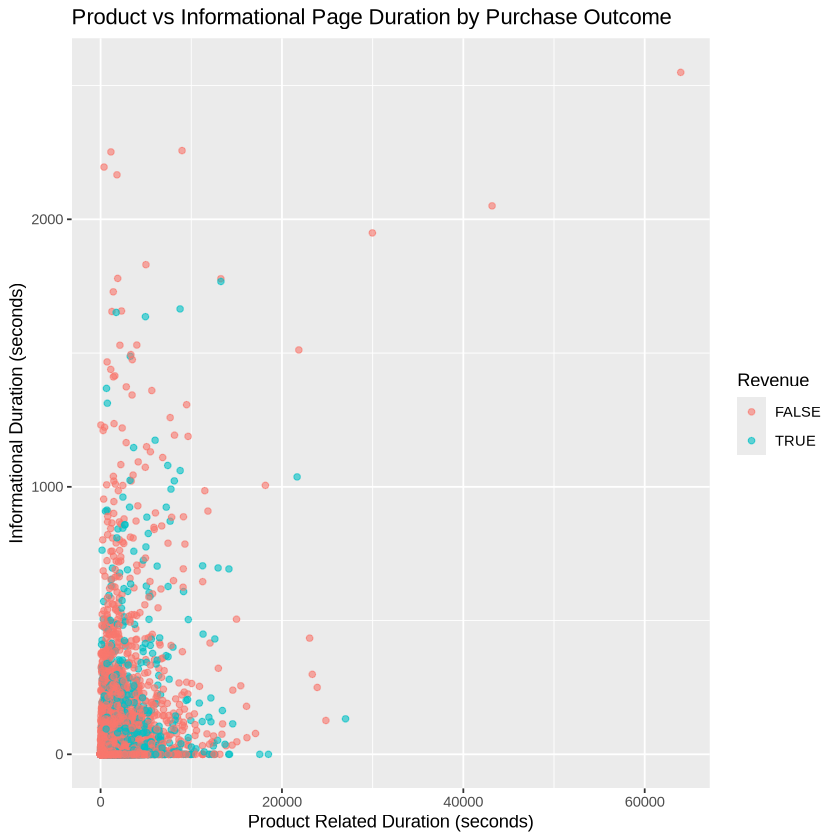

In [4]:
ggplot(data, aes(x = ProductRelated_Duration, 
                 y = Informational_Duration, 
                 color = Revenue)) +
  geom_point(alpha = 0.6) +
  labs(
    title = "Product vs Informational Page Duration by Purchase Outcome",
    x = "Product Related Duration (seconds)",
    y = "Informational Duration (seconds)",
    color = "Revenue"
  )

The scatterplot shows whether a purchase was made on each observation along with how much time was spent on both informative and produce related __pages__.

I was interested in exploring if there was a __difference__ between the observations where a purchase was made and the time spent on informative and product related pages as I expected higher time spent to lead to a higher chance of purchase. This is not clear on the visualization as points from both categories seemed to be similarly spread on the plot. I think this is a good thing as it makes the exploration of the association between variables more interesting since there is no clear association in the plot. 

**Section 4**

*Method and Plan*

As explained in section 2, since the response variable is binary I will use Logistic regression to try to predict if a user will make a purchase or not. I will use Lasso regularazation for the model to perform feature selection and hopefully get better predictions. Since my model uses categorical variables the procedure mentioned will perform feature selection using dummy variables rather than the entire categorical variable. This is not ideal but it is a limitation of this approach. 

Logistic regresssion assumes that the response follows a Bernoulli distrbution and in practice this might not always be the case.

**Section 5**

*Computational Code and Output*

I will fit the model using glmnet, first I will split into a training set and a testing set such that I can see how the model performs on unseen data. 

In [23]:
set.seed(2002)

# Make sure categorical variables are treated as factors
data <- data |>
  mutate(
    Month = factor(Month),
    VisitorType = factor(VisitorType),
    Weekend = factor(Weekend),
    OperatingSystems = factor(OperatingSystems),
    Revenue = factor(Revenue, levels = c("FALSE", "TRUE"))  # ensure 0/1 order
  )

# 70% of the data will be used for training
train_idx <- sample(seq_len(nrow(data)), size = 0.7 * nrow(data))
train <- data[train_idx, ]
test  <- data[-train_idx, ]

# Create model matrices for glmnet()
y_train <- ifelse(train$Revenue == "TRUE", 1, 0)
X_train <- model.matrix(Revenue ~ ., data = train)[, -1]

y_test <- ifelse(test$Revenue == "TRUE", 1, 0)
X_test <- model.matrix(Revenue ~ ., data = test)[, -1]

# Fit cross-validated LASSO, logistic regression
cvfit <- cv.glmnet(
  x = X_train,
  y = y_train,
  family = "binomial",
  alpha = 1
)

# 1-SE lambda (lambda.min was very small)
best_lambda_1se <- cvfit$lambda.1se

# Predict on test set
pred_prob  <- predict(cvfit, newx = X_test, s = "lambda.1se", type = "response")
pred_class <- ifelse(pred_prob > 0.5, 1, 0)

# Compute accuracy
accuracy <- mean(pred_class == y_test)

cat("The prediction accuracy on the test set is", round(accuracy, 4), "\n")

# Extract coefficients
coef_lasso <- coef(cvfit, s = "lambda.1se")

# Convert to a tidy table
selected_covariates <- as_tibble(as.matrix(coef_lasso), rownames = "covariate") %>%
  rename(estimate = s1) %>%   
  filter(estimate != 0)      

selected_covariates

The prediction accuracy on the test set is 0.8802 


covariate                    estimate     
1 (Intercept)                  -2.212149e+00
2 Administrative                3.353924e-03
3 ProductRelated                2.910739e-03
4 ProductRelated_Duration       1.541676e-05
5 ExitRates                    -8.086005e+00
6 PageValues                    7.027491e-02
7 MonthNov                      7.070156e-01
8 VisitorTypeReturning_Visitor -1.603709e-01

The results are what I expected, the model performed featured selection and selected a small subset of features which was able to achieve a very high accuracy on unseen data, correctlty predicting 88% of the observation on the test set. There is one problem with this model as explained on section 4 in that the model is selecting dummy variables, it selected MonthNov and VisitorTypeReturning_Visitor which are both dummy variables. I think a solution for this would be to re fit a model which all the dummy variables in both Month and VisitorType. 